<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Magíster en Data Science</em><br>
    <em>Profesor: Takeshi Asahi Kodama</em><br>

</div>

# **<center>Tarea 2: Introducción a la Visión Computacional</center>**
*12 de mayo de 2025*

**Nombre Estudiante**: Cristian Tobar Morales  
**Asignatura**: Visión Computacional 

## **01. INTRODUCCIÓN**
El presente informe detalla una base de datos correspondiente a imágenes de cobertura terrestre, con el fin del preprocesamiento la cual cuenta con diferentes coberturas en sus datos.

La base de datos fue obtenida de la plataforma en línea [Kaggle][DataSet], la cual se especializa en ciencia de datos y Machine Learning.

Este conjunto de datos corresponde a imágenes de cobertura terrestre registradas por el satélite Sentinel-2, diseñado para la clasificación de tipos de suelo y aplicaciones de teledetección. El registro cuenta con 10 clases distintas de cobertura.

[DataSet]: https://www.kaggle.com/datasets/salmaadell/eurosat-rgb 


## **02. OBJETIVO**

## **03. METODOLOGÍA**

## **04. DESCRIPCIÓN DE LA BASE DE DATOS**
El dataset contiene imágenes de cobertura terrestres registradas por el satélite Sentinel-2, diseñados para la clasificación de tipos de suelo y aplicaciones de teledetección. La base de datos contiene un conjunto de diez clases distintas de cobertura. 

Los terrenos que cubre:
-	**Bosque (Forest):** Áreas densamente arboleadas, incluidos bosques naturales y plantaciones.
-	**Residencial (Residential):** Regiones urbanas y suburbanas con casas, edificios y asentamientos.  
-	**Vegetación Herbácea (Herbaceous Vegetation):** Pastizales, arbustos y plantas no leñosas. 
-	**Mar/Lago (Sea/Lake):** Grandes masa de agua, incluidos mares, lagos y océanos. 
-	**Cultivo Anual (Annual Crop):** Tierras de cultivo, con cultivos desde que se planta y cosechan en un solo año.
-	**Industrial:** Áreas con fábricas, almacenes e instalaciones de fabricación. 
-	**Río (River):** Cuerpos de agua que fluyen, como ríos y arroyos. 
-	**Autopista (Highway):** Carreteras principales, autopistas y rutas de transporte. 
-	**Cultivo permanente (Permanent Crop):** Terrenos con cultivo que crecen de forma continua, como viñedos y huertos. 
-	**Pastizales (Pasture):** Pastizales utilizados para el pastoreo del ganado.


#------ REVIZAR ----------
Cantidad de imágenes por clase:
-	Bosque, Residencial, Vegetación Herbácea, Mar/Lago y Cultivo Anual, cuentan con 3000 imágenes.
-	Industrial, Río, Autopista y Cultivo permanente, cuentan con 2500 imágenes.
-	 Pastizales, cuenta con 2000 imágenes.  

## **05. DESARROLLO**

### **CARGA Y ANÁLISIS EXPLORATORIO DE LOS DATOS**

#### Librerías requeridas

In [3]:
import os
import json
from PIL import Image, UnidentifiedImageError, ImageFilter
from IPython.display import display  # Para mostrar imágenes en Jupyter Notebook
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.io import parse_single_example, FixedLenFeature

#### Información inicial del dataset

In [42]:
# Ruta para obtener información general de las imágenes 
image_path = 'data/image.image.json'

with open(image_path, 'r') as f:
    image_info = json.load(f)

print("\033[1mINFORMACIÓN GENERAL DE IMÁGENES\033[0m")
print(json.dumps(image_info, indent=2, sort_keys=True))


INFORMACIÓN GENERAL DE IMÁGENES
{
  "encoding_format": "png",
  "shape": [
    64,
    64,
    3
  ]
}


In [10]:
label_path = 'data/label.labels.txt'
with open(label_path, 'r') as f:
    label_names = f.read().splitlines()

print("\033[1mLISTA DE ETIQUETAS\033[0m")
print(f'Cantidad: {len(label_names)}\n')
print("\n".join(label_names))

LISTA DE ETIQUETAS
Cantidad: 10

AnnualCrop
Forest
HerbaceousVegetation
Highway
Industrial
Pasture
PermanentCrop
Residential
River
SeaLake


#### Ingreso de los datos

In [7]:
# Ruta al TFRecord
tfrecord_file = 'data/eurosat-train.tfrecord-00000-of-00001'

# Crear el dataset en crudo
dataset = tf.data.TFRecordDataset(tfrecord_file)



# Definir la descripción de las características basándose en el TFRecord
feature_description = {
    'image': tf.io.FixedLenFeature([], tf.string),
    'label': tf.io.FixedLenFeature([], tf.int64)
}

def _parse_function(example_proto):
    parsed_features = tf.io.parse_single_example(example_proto, feature_description)
    # Usa decode_png ya que tus imágenes son PNG
    image = tf.io.decode_png(parsed_features['image'], channels=3)
    label = parsed_features['label']
    return image, label


parsed_dataset = dataset.map(_parse_function)


#### Visualización 
Se imprime una imagen por cada clase de terreno, con el objetivo de observar los archivos entregados para dicho estudio.

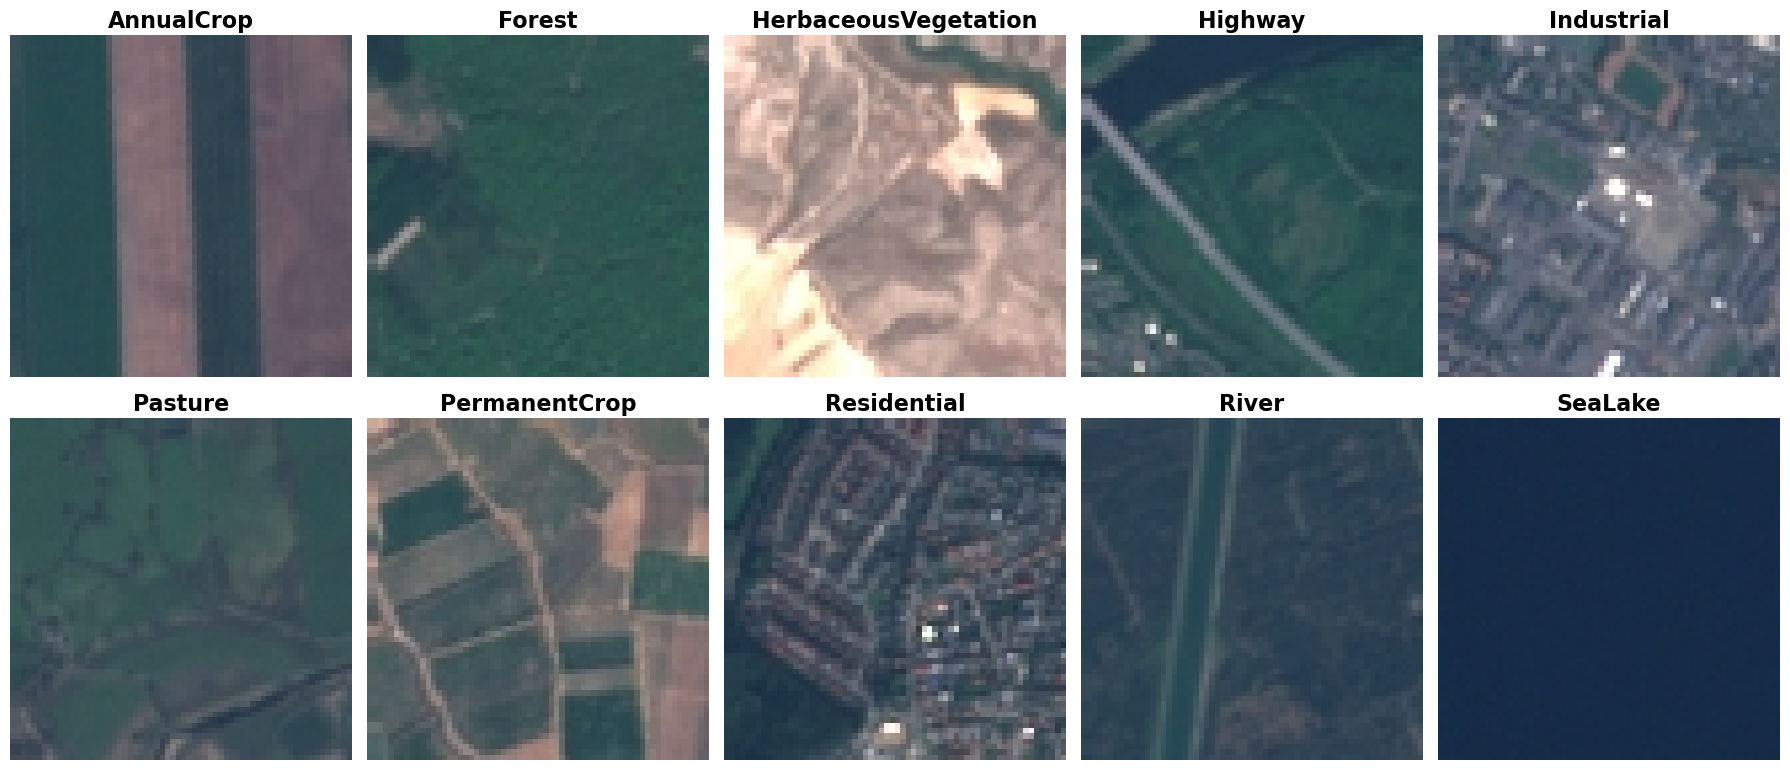

In [27]:
# Función para visualizar una imagen de ejemplo por cada terreno
def visualizar_img(data): 
    
    """
    Visualiza una imagen representativa para cada tipo de terreno.
    Se espera que 'data' sea un dataset de TensorFlow que devuelva pares (image, label),
    y que 'label_names' sea una lista global con el nombre de las etiquetas.
    """
    
    #Diccionario para almacenar una imagen representativa para cada etiqueta numérica.
    images_by_type = {}
    
    # Iterear sobre el dataset para recolectar una imagen representativa para cada etiqueta númerica
    for image, label in data:
        nombre = label.numpy() # Obtener el entero de la etiqueta
        
        # Condicional para el caso que no este guardada la img
        if nombre not in images_by_type:
            # Convertimos el tensor de imagen a un array de NumPy para Matplotlib
            images_by_type[nombre] = image.numpy()
        
        # Si ya tenemos una img por cada clase, detenemos la iteración
        if len(images_by_type) == len(label_names):
            break
    
    # Número total de clases
    num_classes = len(label_names)
    
    # Definir la grilla; por ejemplo, para 10 clases puedes usar 2 filas y 5 columnas
    rows = 2
    cols = num_classes // rows

    plt.figure(figsize=(18, 8))
    for i in range(num_classes):
        try:
            plt.subplot(rows, cols, i+1)
            # Mostrar la imagen almacenada para la clase i
            plt.imshow(images_by_type[i])
            # Título usando el nombre textual de la clase
            plt.title(label_names[i], fontsize=16, fontweight='bold')
            plt.axis('off') # Quitar los ejes
        except Exception as e:
            print(f"Error al mostrar la imagen '{label_names[i]}': {e}")
        
    plt.tight_layout() # Ajustar espacio entre imágenes
    plt.show() # imprimir img
        

# Ejecutar función  

visualizar_img(parsed_dataset)

#### Dataset de entrenamiento y test (80% train y 20% test)

In [ ]:
# Obtener la cantidad total de datos
total_count = parsed_dataset.reduce(tf.constant(0), lambda counter, _: counter + 1).numpy()
print("Total de muestras:", total_count)

Total de muestras: 27000


In [ ]:
# Definir la proporción de entrenamiento y test (80% train, 20% test)
train_size = int(total_count * 0.8)
test_size = total_count - train_size

# Barajar (shuffle) el dataset para que la división sea aleatoria.
# Usamos el total_count como buffer_size para barajar todo el dataset.
shuffled_dataset = parsed_dataset.shuffle(buffer_size=total_count, reshuffle_each_iteration=False)

# Dividir el dataset:
train_dataset = shuffled_dataset.take(train_size)
test_dataset = shuffled_dataset.skip(train_size)

# Verificar las cantidad resultantes:
print("Muestras en train:", train_dataset.reduce(tf.constant(0), lambda counter, _: counter + 1).numpy())
print("Muestras en test:", test_dataset.reduce(tf.constant(0), lambda counter, _: counter + 1).numpy())

Muestras en train: 21600
Muestras en test: 5400


### **PREPROCESAMIENTO DE LOS DATOS**

#### Transformación a escala de grises ?

#### Eliminar ruido

#### Detección de Bordes